---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

# Steps in the process

* Explore the training variables
* Make a list of the classifiers I could try (not neutral network related)

In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load the data
Just pick a few columns to start the analysis on.

In [3]:
data_path = r'../course3_downloads/'

In [4]:
train_filename = r'train.csv'
test_filename = r'test.csv'
addresses_filename = r'addresses.csv'
latlons_filename = r'latlons.csv'

In [5]:
usecols = {'ticket_id':np.int32,
           #'agency_name',
           'inspector_name':str,
           'zip_code':str,
           'violation_code':str,
           'fine_amount':np.float32,
           'judgment_amount':np.float32,
           'compliance':np.float32}

## Load the training data

In [6]:
train_df_raw = pd.read_csv(os.path.join(data_path,train_filename),header=0,
            usecols=usecols.keys(), dtype=usecols)
train_df_raw.head()

,ticket_id,inspector_name,zip_code,violation_code,fine_amount,judgment_amount,compliance
0,22056,"Sims, Martinzie",60606,9-1-36(a),250.0,305.0,0.0
1,27586,"Williams, Darrin",48208,61-63.0600,750.0,855.0,1.0
2,22062,"Sims, Martinzie",48223,9-1-36(a),250.0,0.0,NaN
3,22084,"Sims, Martinzie",48214,9-1-36(a),250.0,0.0,NaN
4,22093,"Sims, Martinzie",48206,9-1-36(a),250.0,0.0,NaN


## Remove the `NaN` values

First check to see where the `NaN` values are.

In [8]:
for col in train_df_raw.columns:
    print(col, np.sum(train_df_raw[col].isnull()))

ticket_id 0
inspector_name 0
zip_code 1
violation_code 0
fine_amount 1
judgment_amount 0
compliance 90426


Now remove them. This command will remove any row where there are any `NaN` values.

In [22]:
train_df = train_df_raw.dropna(axis=0,how='any').copy(deep=True)

## Load `test_df`

I don't need to remove `NaN` from this because my final output will require all of the lines from the original test data.

In [23]:
test_df = pd.read_csv(os.path.join(data_path,test_filename),header=0,
            usecols=list(usecols.keys())[:-1], dtype=usecols)
test_df.head()

,ticket_id,inspector_name,zip_code,violation_code,fine_amount,judgment_amount
0,284932,"Granberry, Aisha B",48213,22-2-61,200.0,250.0
1,285362,"Lusk, Gertrina",48219,22-2-88(b),1000.0,1130.0
2,285361,"Lusk, Gertrina",48219,22-2-43,100.0,140.0
3,285338,"Talbert, Reginald",48183,22-2-88(b),200.0,250.0
4,285346,"Talbert, Reginald",48154,22-2-45,100.0,140.0


## Clean up the zip code

Shorten all to five digits

In [25]:
def clean_zip(zip_in):
    try:
        if len(zip_in) == 5:
            return zip_in
        else:
            return zip_in[:5]
    except:
        print(zip_in, type(zip_in))
        return zip_in

In [26]:
train_df['zip_code'] = train_df['zip_code'].apply(clean_zip)
test_df['zip_code']  = test_df['zip_code'].apply(clean_zip)

nan <class 'float'>
nan <class 'float'>
nan <class 'float'>


# Explore the training data a bit

## Look at the training compliance.

In [24]:
train_df['compliance'].describe()

count    159879.000000
mean          0.072530
std           0.259307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: compliance, dtype: float64

This says that only 7% of the tickets were paid.

## Split into features and target X and y

In [27]:
X_train = train_df.drop('compliance',axis=1)
y_train = train_df['compliance']

In [28]:
X_train.head()

,ticket_id,inspector_name,zip_code,violation_code,fine_amount,judgment_amount
0,22056,"Sims, Martinzie",60606,9-1-36(a),250.0,305.0
1,27586,"Williams, Darrin",48208,61-63.0600,750.0,855.0
5,22046,"Sims, Martinzie",90804,9-1-36(a),250.0,305.0
6,18738,"Williams, Darrin",48038,61-63.0500,750.0,855.0
7,18735,"Williams, Darrin",48211,61-63.0100,100.0,140.0


In [29]:
y_train.head()

0    0.0
1    1.0
5    0.0
6    0.0
7    0.0
Name: compliance, dtype: float32

In [69]:
X_train.corr()

,ticket_id,fine_amount,judgment_amount
ticket_id,1.000000,-0.00144,-0.000765
fine_amount,-0.001440,1.00000,0.999890
judgment_amount,-0.000765,0.99989,1.000000


# Look at violation types

In [35]:
X_train['violation_code'].value_counts()

9-1-36(a)               64414
9-1-81(a)               23145
22-2-88                 19072
9-1-104                 16927
22-2-88(b)               4879
22-2-45                  4200
9-1-105                  3619
9-1-110(a)               3147
9-1-43(a) - (Dwellin     3043
9-1-103(C)               2641
22-2-22                  2612
22-2-43                  2054
19450901                 1620
22-2-17                  1414
22-2-61                   706
22-2-83(a)(b)(c)          494
9-1-82(d) - (Dwellin      457
61-81.0100/32.0066        439
9-1-43(a) - (Structu      399
22-2-83                   347
9-1-206                   235
22-2-88(a)                235
61-5-21                   202
9-1-209                   200
22-2-21(b)                185
9-1-101                   150
9-1-107                   133
9-1-43(a) - (Stories      132
9-1-111                   130
9-1-201(a)                128
                        ...  
9-1-375                     1
9-1-377                     1
9-1-46(a) 

It looks like violation code and violation type are a direct mapping, from our looking through the Excel file. 

# Try a decision tree

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_prime, y_train, y_prime = train_test_split(X_train, y_train, random_state=0)

Initialize the decision tree classifier

In [49]:
from sklearn.metrics import roc_curve, auc

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train[['fine_amount','judgment_amount']],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
y_pred_clf = clf.predict_proba(X_prime[['fine_amount','judgment_amount']])[:,1]
fpr_clf, tpr_clf, _ = roc_curve(y_prime, y_pred_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
print(roc_auc_clf)

0.7507079579326563


View a plot of the ROC curve. 

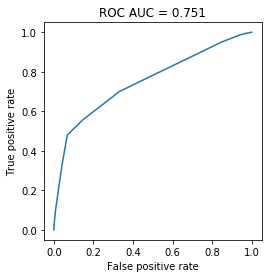

In [64]:
fig = plt.figure()
ax = fig.gca()
ax.plot(fpr_clf, tpr_clf)
ax.set_xlabel('False positive rate'); ax.set_ylabel('True positive rate')
ax.set_title('ROC AUC = {0:.3}'.format(roc_auc_clf))
ax.set_aspect('equal')
plt.show()

So, this is a very simple model and is only using the fine amount and judgment amount. However, it is achieving an AUC > 0.7 which is the criteria for passing the assignment, so I am going to clean this up and run it through the grader and see how it goes. I'm going to create a new notebook called `Assignment+4+solution.ipynb` to submit to the grader. 